HW2

Imbalanced Classification Dataset
- standard SVM mode

In [50]:
from sklearn.datasets import make_classification
from IPython.display import Image

In [51]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4) 
# 클래스 별 데이터의 갯수에 차이를 주고 싶을 땐, weights인수를 설정하면 된다.
# https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/

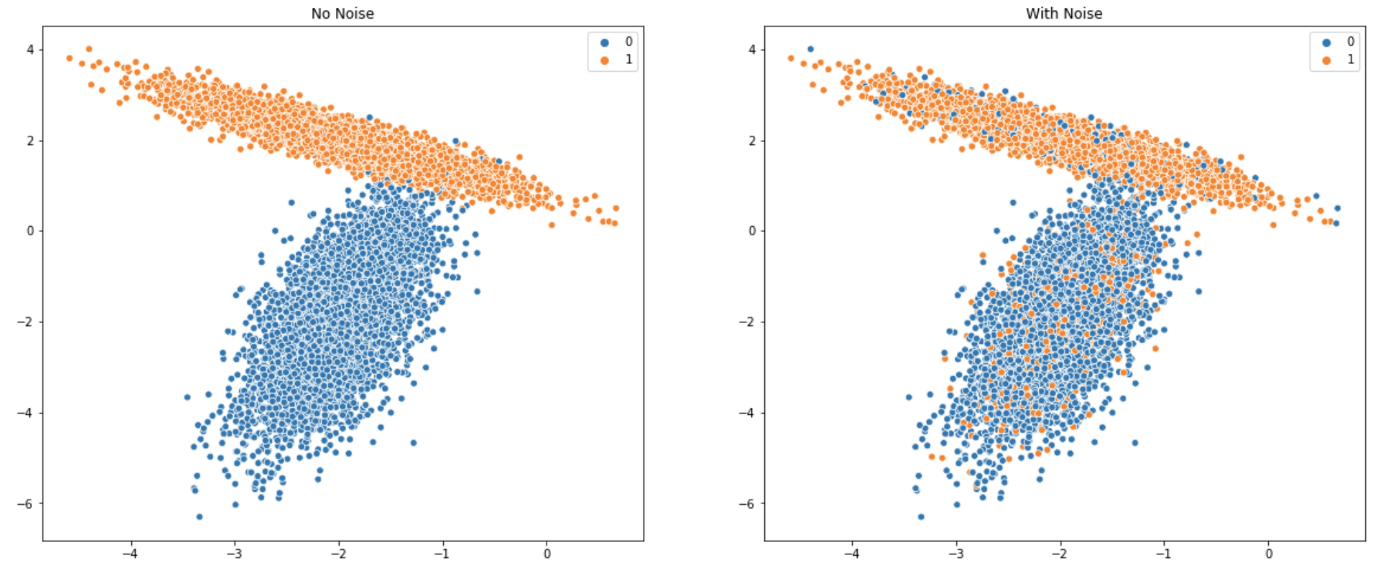

In [52]:
Image("8.png") #flip_y : 왼쪽은 0 , 오른쪽은 0.2

In [53]:
import collections

In [54]:
# summarize class distribution
counter = collections.Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [55]:
import numpy as np
import matplotlib.pyplot as plt

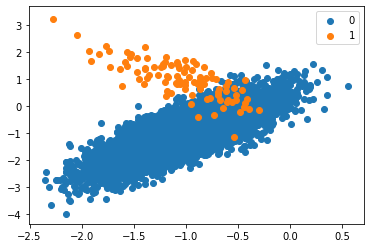

In [56]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [57]:
# fit a svm on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

In [58]:
# define model
model = SVC(gamma='scale')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)  #The number of CPUs to use to do the computation. -1: a;; 
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.808


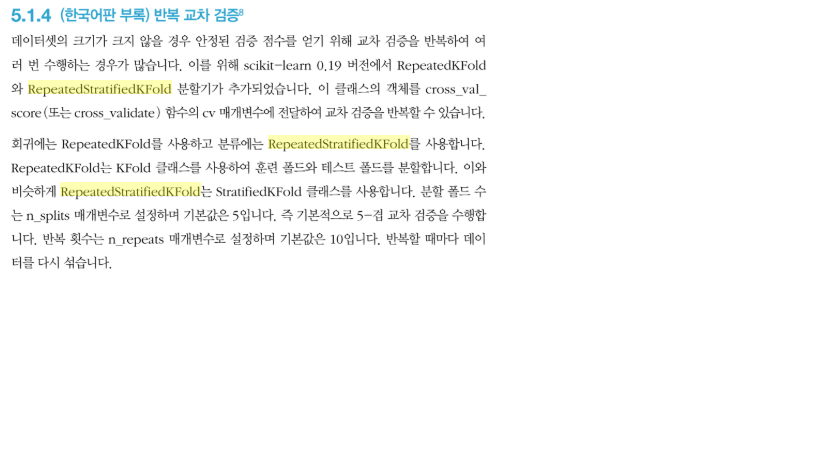

In [59]:
Image('9.png')

Imbalanced Classification Dataset
- Weighted SVM With Scikit-Learn

In [60]:
# define model
model = SVC(gamma='scale', class_weight='balanced')  # balance로 하면 weight는 (전체sample 수 / 해당 class의 sample 수) 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.967


아래처럼도 가능하다.

In [61]:
## define model
#weights = {0:1.0, 1:100.0}
#model = SVC(gamma='scale', class_weight=weights)

## define model
#weights = {0:0.01, 1:1.0}
#model = SVC(gamma='scale', class_weight=weights)

Grid Search Weighted SVM

We will try the following weightings for class 0 and 1:

Class 0: 100, Class 1: 1
Class 0: 10, Class 1: 1
Class 0: 1, Class 1: 1
Class 0: 1, Class 1: 10
Class 0: 1, Class 1: 100

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# define model
model = SVC(gamma='scale')

# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
 #n_splits=10: 10등분한 거, 총 10개
 #n_repeats=3: 다시 섞어서 위 과정 진행 -> 총 30개의 train_test_mse를 평균

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(X, y)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967747 using {'class_weight': {0: 1, 1: 100}}
0.742960 (0.149857) with: {'class_weight': {0: 100, 1: 1}}
0.748404 (0.149873) with: {'class_weight': {0: 10, 1: 1}}
0.807960 (0.126354) with: {'class_weight': {0: 1, 1: 1}}
0.934401 (0.065202) with: {'class_weight': {0: 1, 1: 10}}
0.967747 (0.038637) with: {'class_weight': {0: 1, 1: 100}}


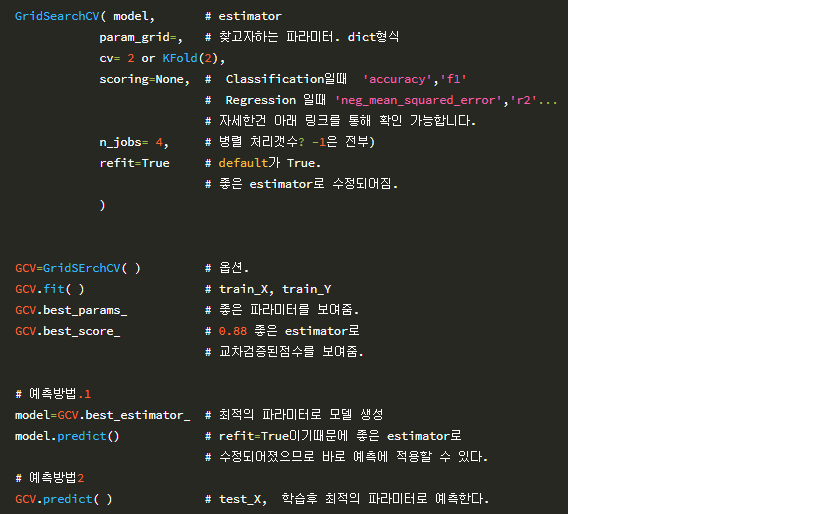

In [64]:
Image('10.png')

In [65]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter - scoring 관련